Archivo temporal, luego se unen

- 3.1: Propiedades de chi-cuadrado con n-grados de libertad

- 3.13: Script de simulación de intervalos

- 6.4: Script regresión lineal y bandas

- 6.6: Script de regresión y CV en sklearn

- 6.9: Trabajando con datos reales de AURORA

- 6.13: Curse of dimensionality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
import seaborn as sns
import plotly.express as px

### 3.1

Con matplotlib

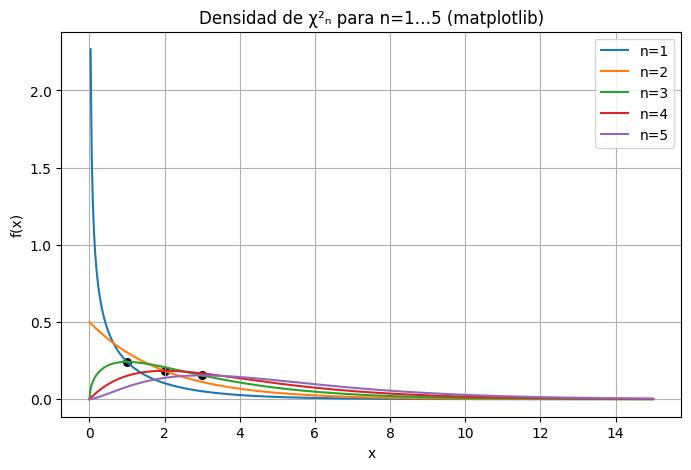

In [2]:

# 1. Datos
x = np.linspace(0, 15, 500)
grados = [1,2,3,4,5]

# 2. Plot
plt.figure(figsize=(8,5))
for n in grados:
    plt.plot(x, chi2.pdf(x, df=n), label=f'n={n}')
    if n >= 3:
        plt.scatter(n-2, chi2.pdf(n-2, df=n), color='k', s=30)

# 3. Detalles
plt.title('Densidad de χ²ₙ para n=1…5 (matplotlib)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Seaborn

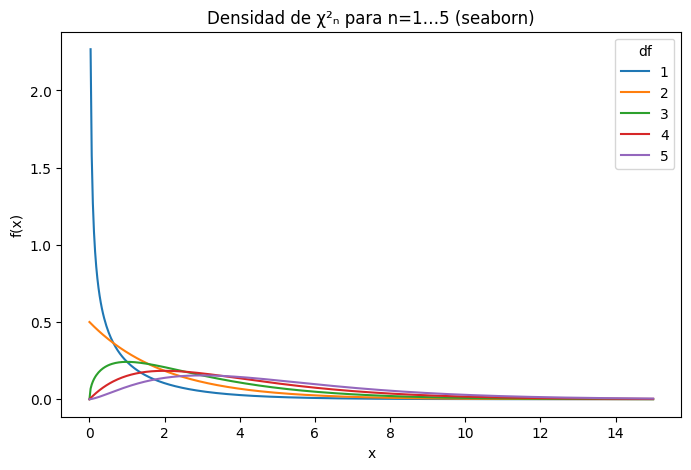

In [ ]:

# Preparamos un DataFrame “largo” para seaborn
x = np.linspace(0, 15, 500)
grados = [1,2,3,4,5]
df = pd.DataFrame({
    'x': np.tile(x, len(grados)),
    'df': np.repeat(grados, len(x)),
})
df['pdf'] = df.apply(lambda row: chi2.pdf(row.x, df=int(row.df)), axis=1)

# Plot
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='x', y='pdf', hue='df', palette='tab10')
plt.title('Densidad de χ²ₙ para n=1…5 (seaborn)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()


Plotly.express

In [5]:

# Datos “largos”
x = np.linspace(0, 15, 500)
grados = [1,2,3,4,5]
data = {
    'x': np.tile(x, len(grados)),
    'df': np.repeat(grados, len(x)),
}
import pandas as pd
df = pd.DataFrame(data)
df['pdf'] = df.apply(lambda r: chi2.pdf(r.x, df=int(r.df)), axis=1)

# Plot interactivo
fig = px.line(df, x='x', y='pdf', color='df',
              title='Densidad de χ²ₙ para n=1…5 (plotly.express)',
              labels={'pdf':'f(x)', 'x':'x', 'df':'n'})
fig.update_layout(legend_title_text='Grados de libertad')
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed